In [6]:
import pandas as pd
pd.options.display.float_format = '{:.0f}'.format

In [7]:
dataset = pd.read_csv(r'C:\Users\jackc\Semester2\Project\Identifying-Hate-Speech-Categories-On-Social-Media\Data\clean_dataset.csv')

In [8]:
dataset.head(5)

,id,text,Annotation,tokenized_text,text_lemma,Hate
0,596965466238619648,i just found the perfect rental why cant my le...,Neither,"['found', 'perfect', 'rental', 'cant', 'lease'...","['found', 'perfect', 'rental', 'cant', 'lease'...",0
1,575891807873040384,every time they discover anything its either ...,Neither,"['every', 'time', 'discover', 'anything', 'eit...","['every', 'time', 'discover', 'anything', 'eit...",0
2,595259457828884480,ok time to write code bbl\n\nmaking a new thing,Neither,"['ok', 'time', 'write', 'code', 'bbl', 'making...","['ok', 'time', 'write', 'code', 'bbl', 'making...",0
3,572344911002927104,refined dessert not mkr,Neither,"['refined', 'dessert', 'mkr']","['refined', 'dessert', 'mkr']",0
4,568132033215475712,one of the best things anyone can do to impr...,Neither,"['one', 'best', 'things', 'anyone', 'improve',...","['one', 'best', 'thing', 'anyone', 'improve', ...",0


In [10]:
print("size of dataset:", len(dataset), "\n")
print("class distribution of dataset:")
print(dataset['Annotation'].value_counts())

size of dataset: 6836 

class distribution of dataset:
Neither       5740
Sexism         911
Racism          98
Homophobia      87
Name: Annotation, dtype: int64


In [12]:
none, sexism, racism, both = dataset['Annotation'].value_counts().values
dataset_size = len(dataset)
print("Percentage of tweets that contain no hate speech:", none / dataset_size, "%")
print("Percentage of tweets that contain sexism:", sexism / dataset_size, "%")
print("Percentage of tweets that contain racism:", racism / dataset_size, "%")
print("Percentage of tweets that contain both sexism and racism:", both / dataset_size, "%")

Percentage of tweets that contain no hate speech: 0.839672322995904 %
Percentage of tweets that contain sexism: 0.13326506729081333 %
Percentage of tweets that contain racism: 0.014335868929198362 %
Percentage of tweets that contain both sexism and racism: 0.01272674078408426 %


In [64]:
#example tweets
print("Examples of tweets which fall within each class:")
dataset.iloc[[6,1000,6724,6752]]

Examples of tweets which fall within each class:


,id,text,Annotation,tokenized_text,text_lemma,Hate
6,567833561127997440,buttons are weird gave up trying to hit them i...,Neither,"['buttons', 'weird', 'gave', 'trying', 'hit', ...","['button', 'weird', 'gave', 'trying', 'hit', '...",0
1000,570731745752064000,yes it is legit sweden is one place any livin...,Sexism,"['yes', 'legit', 'sweden', 'one', 'place', 'li...","['yes', 'legit', 'sweden', 'one', 'place', 'li...",1
6724,573811442563964928,another arab car terror attack in jerusalem ...,Racism,"['another', 'arab', 'car', 'terror', 'attack',...","['another', 'arab', 'car', 'terror', 'attack',...",1
6752,448730038905478976,stop smearing feces on the wall homosexuals,Homophobia,"['stop', 'smearing', 'feces', 'wall', 'homosex...","['stop', 'smearing', 'feces', 'wall', 'homosex...",1


In [69]:
no_hate = dataset.iloc[6].text
sexism = dataset.iloc[1000].text
racism = dataset.iloc[6724].text
homophobia = dataset.iloc[6752].text

print("No hate speech:\n", no_hate)
print("\nSexism:\n", sexism)
print("\nRacism:\n", racism)
print("\nHomophobia:\n", homophobia)


No hate speech:
 buttons are weird gave up trying to hit them in the right spot and started swiping to page backwards power button is weird

Sexism:
  yes it is legit sweden is one place any living thing should never visit  feminazi and extremist word is law there

Racism:
   another arab car terror attack in jerusalem israel will obama call it random traffic infringement 

Homophobia:
 stop smearing feces on the wall homosexuals  


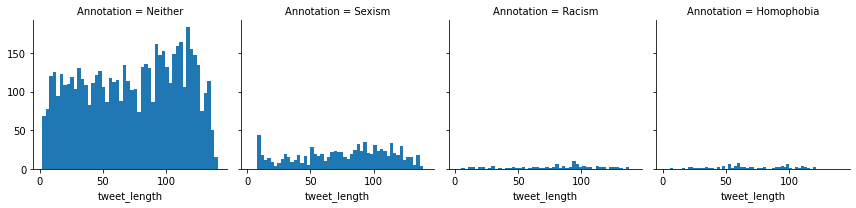

In [80]:
#visualising tweet length based on class
dataset['tweet_length'] = dataset['text'].apply(len)

import seaborn as sns
import matplotlib.pyplot as plt
graph = sns.FacetGrid(data=dataset, col='Annotation')
graph.map(plt.hist, 'tweet_length', bins=50)

<AxesSubplot:xlabel='Annotation', ylabel='tweet_length'>

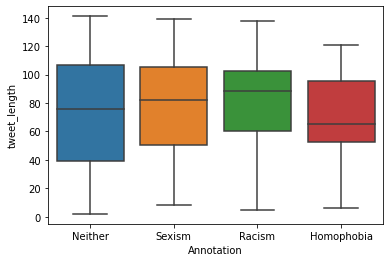

In [81]:
sns.boxplot(x='Annotation', y='tweet_length', data=dataset)

## Tweet Length
Very little variation in the tweet lengths in relation to classes

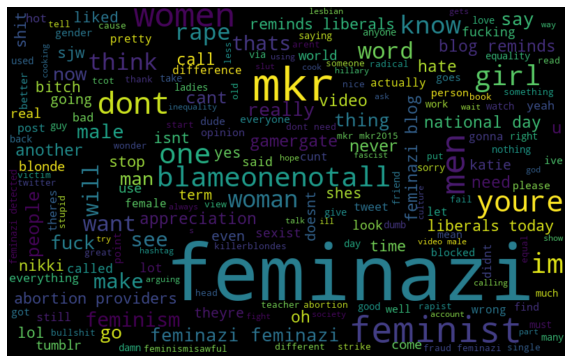

In [96]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_sexism = ' '.join([text for text in dataset['text'][dataset['Annotation'] == 'Sexism']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_sexism)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

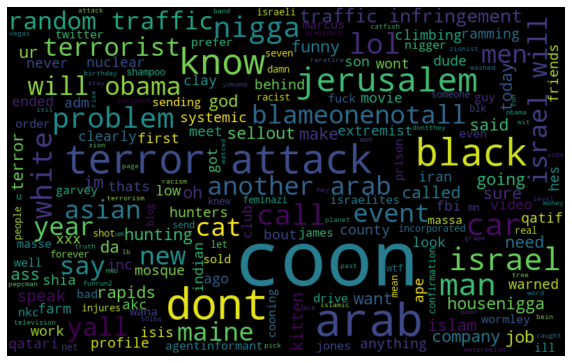

In [97]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_racism = ' '.join([text for text in dataset['text'][dataset['Annotation'] == 'Racism']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_racism)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

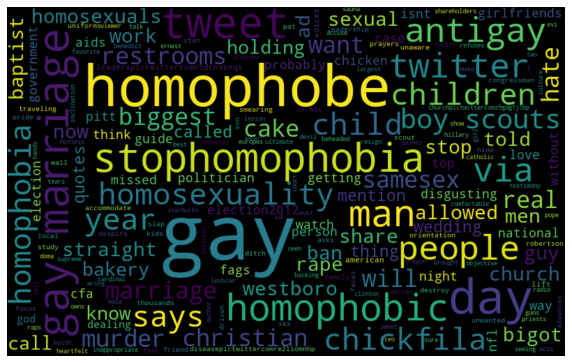

In [98]:
# wordcloud for common words in dataset for the hateful classes
from wordcloud import WordCloud
hate_speech_homophobia = ' '.join([text for text in dataset['text'][dataset['Annotation'] == 'Homophobia']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(hate_speech_homophobia)
random=0.30
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()